# Praca domowa nr 6

In [1]:
import pandas as pd
import numpy as np
dane = pd.read_csv('https://raw.githubusercontent.com/mini-pw/2020L-WUM/master/Prace_domowe/Praca_domowa6/clustering_R3.csv')
dane.head()

,X1,X2,X3
0,152.077986,197.910402,1.095707
1,145.520487,202.128032,2.738826
2,155.441273,198.122696,0.640457
3,150.389105,206.808383,0.686486
4,149.863221,205.417527,3.555814


In [15]:
dane.shape

(1000, 3)

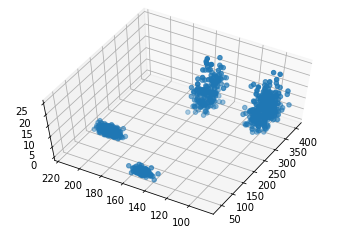

In [12]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(60, 210)
ax.scatter3D(dane['X1'], dane['X2'], dane['X3']);

## Metoda k-średnich

### Sprawdzenie optymalnego k
Będę się posiłkował kodem z poprzedniej pracy domowej wykonanej przeze mnie - chodzi bardziej o sprawdzenie, czy faktycznie są tylko cztery klastry, czy może jest ich więcej i nie widać tego dobrze na wykresie 3d.

In [8]:
from sklearn.cluster import KMeans
def count_wcss_scores(dane, k_max):
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=121)
        kmeans.fit(dane)
        wcss = kmeans.score(dane) * -1
        scores.append(wcss)
    return scores

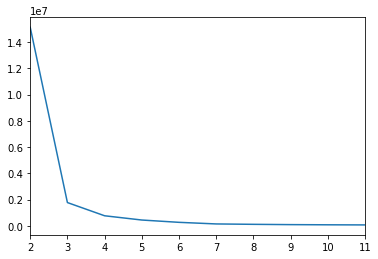

In [9]:
wyniki = pd.Series(count_wcss_scores(dane, 10))
wyniki.index += 2
wyniki.plot.line(xticks = list(range(2, 12)))

Wygląda na to, że można faktycznie przyjąć k=4

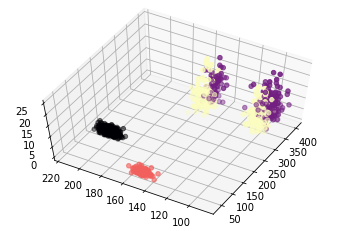

In [25]:
kmeans = KMeans(n_clusters=4, random_state=121)
kmeans.fit(dane)
l_kmeans = kmeans.predict(dane)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(60, 210)
ax.scatter3D(dane['X1'], dane['X2'], dane['X3'], c = l_kmeans, cmap = 'magma');

## Birch

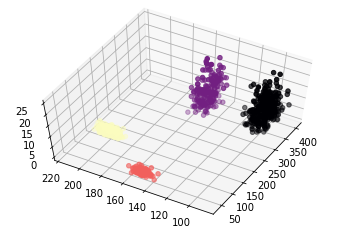

In [23]:
from sklearn.cluster import Birch
birch = Birch(n_clusters = 4)
l_birch = birch.fit_predict(dane)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(60, 210)
ax.scatter3D(dane['X1'], dane['X2'], dane['X3'], c = l_birch, cmap = 'magma');

## Porównanie za pomocą metryk
### Współczynnik Silhouette

W tym pakiecie jest to średnia Silhouette score dla każdego punktu, czyli sprawdzenia jak dany punkt jest "podobny" do swojego klastra. Miarę dla każdego punktu liczy się w następujący sposób: (b-a)/max(a, b), gdzie b to dystans między punktem, a najbliższym klastrem (poza tym, do którego należy), a a to średni dystans wewnątrz klastra. Maksymalna wartość to 1, im wyższy wynik tym lepiej

In [26]:
from sklearn.metrics import silhouette_score
# Kmeans
silhouette_score(dane, l_kmeans)

0.6614753522212494

In [27]:
# Birch
silhouette_score(dane, l_birch)

0.6837538942794454

### Indeks Daviesa–Bouldina

Ten indeks zdefiniowany jest jako średnia stosunków pomiędzy dystansów wewnątrz klastrów i między klastrami. Dzięki temu jeżeli klastry, są dalej od siebie i są mniej rozproszone, to wynik jest wyższy. W przeciwieństwie do poprzedniej miary, tutaj niższy wynik oznacza lepszy clustering.

In [28]:
from sklearn.metrics import davies_bouldin_score
# Kmeans
davies_bouldin_score(dane, l_kmeans)

0.6279373864488536

In [30]:
# Birch
davies_bouldin_score(dane, l_birch)

0.5919841841278377

## Wnioski

Wyniki otrzymane za pomocą metryk wydają się potwierdzać to co widać "na oko" patrząc na to co zostało wyplotowane wcześniej, a mianowicie: Birch radzi sobie nieznacznie lepiej od Kmeans. Problem pierwszego modelu polega na tym, że są tam dwa różne klastry, ułożone równolegle do siebie, więc zamiast zakwalifikować je osobno, Kmeans dzieli oba z grubsza na pół. Nie są to znaczne różnice patrząc na miary, na poziomie 3-5%, mimo to są to widać na pierwszy rzut oka, że są to dwa różne clusteringi. 

## Oświadczenie
Oświadczam, że niniejsza praca stanowiąca podstawę do uznania osiągnięcia efektów uczenia się z przedmiotu Wstęp do Uczenia Maszynowego została wykonana przeze mnie samodzielnie.

Jakub Szypuła
298845